# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city.replace(' ','+') + '&units=imperial' + '&APPID=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samusu
City not found. Skipping...
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | mayumba
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | zabid
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bima
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | ishim
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | qaqortoq
Pr

Processing Record 32 of Set 4 | tiarei
Processing Record 33 of Set 4 | cape town
Processing Record 34 of Set 4 | port hedland
Processing Record 35 of Set 4 | celestun
Processing Record 36 of Set 4 | broome
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | dibulla
Processing Record 40 of Set 4 | mahibadhoo
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | biak
Processing Record 44 of Set 4 | bassar
Processing Record 45 of Set 4 | road town
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | san buenaventura
Processing Record 48 of Set 4 | luxor
Processing Record 49 of Set 4 | berlevag
Processing Record 0 of Set 5 | abha
Processing Record 1 of Set 5 | caravelas
Processing Record 2 of Set 5 | litayen
City not found. Skipping...
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | melo
Processing

Processing Record 21 of Set 8 | madang
Processing Record 22 of Set 8 | somvarpet
Processing Record 23 of Set 8 | filingue
Processing Record 24 of Set 8 | clyde river
Processing Record 25 of Set 8 | ninghai
Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | vila praia de ancora
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | esperance
Processing Record 30 of Set 8 | tomatlan
Processing Record 31 of Set 8 | molinella
Processing Record 32 of Set 8 | clinton
Processing Record 33 of Set 8 | karamay
City not found. Skipping...
Processing Record 34 of Set 8 | tongliao
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | leninskoye
Processing Record 37 of Set 8 | nome
Processing Record 38 of Set 8 | ardea
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | weligama
Processing Record 41 of Set 8 | marienburg
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | palmer
Processin

Processing Record 13 of Set 12 | kushiro
Processing Record 14 of Set 12 | matamoros
Processing Record 15 of Set 12 | avera
Processing Record 16 of Set 12 | bilma
Processing Record 17 of Set 12 | mitu
Processing Record 18 of Set 12 | mazagao
Processing Record 19 of Set 12 | banff
Processing Record 20 of Set 12 | calatagan
Processing Record 21 of Set 12 | kropotkin
Processing Record 22 of Set 12 | thio
Processing Record 23 of Set 12 | nadvoitsy
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | oussouye
Processing Record 26 of Set 12 | jambi
Processing Record 27 of Set 12 | simao
Processing Record 28 of Set 12 | cabedelo
Processing Record 29 of Set 12 | port augusta
Processing Record 30 of Set 12 | garchitorena
Processing Record 31 of Set 12 | port angeles
Processing Record 32 of Set 12 | harper
Processing Record 33 of Set 12 | sur
Processing Record 34 of Set 12 | dinghai
Processing Record 35 of Set 12 | lar gerd
City not found. Skipping...
Processing Record 36 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yulara,-25.2406,130.9889,76.50,43,91,10.22,AU,1681407633
1,mayumba,-3.4320,10.6554,80.76,87,95,7.02,GA,1681407633
2,tuktoyaktuk,69.4541,-133.0374,-9.40,77,20,8.05,CA,1681407634
3,bredasdorp,-34.5322,20.0403,62.02,66,0,13.87,ZA,1681407635
4,rikitea,-23.1203,-134.9692,70.75,92,100,2.48,PF,1681407635


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yulara,-25.2406,130.9889,76.50,43,91,10.22,AU,1681407633
1,mayumba,-3.4320,10.6554,80.76,87,95,7.02,GA,1681407633
2,tuktoyaktuk,69.4541,-133.0374,-9.40,77,20,8.05,CA,1681407634
3,bredasdorp,-34.5322,20.0403,62.02,66,0,13.87,ZA,1681407635
4,rikitea,-23.1203,-134.9692,70.75,92,100,2.48,PF,1681407635


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

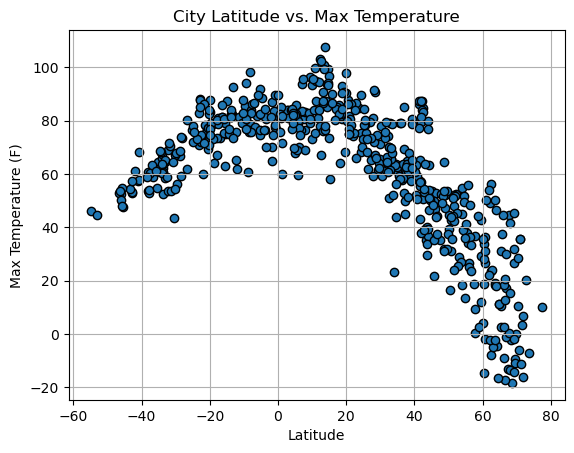

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

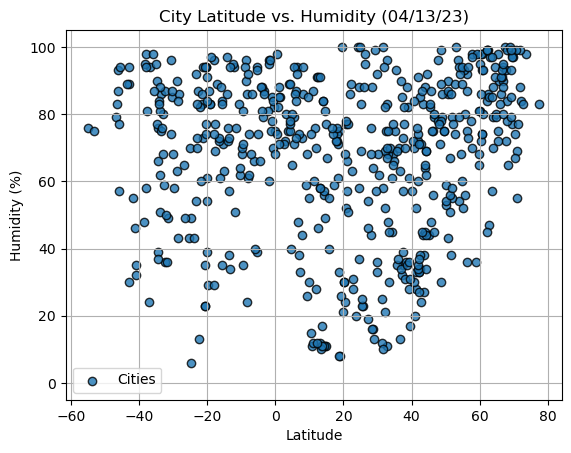

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5, 105)
plt.grid(True)
plt.legend(loc="best")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

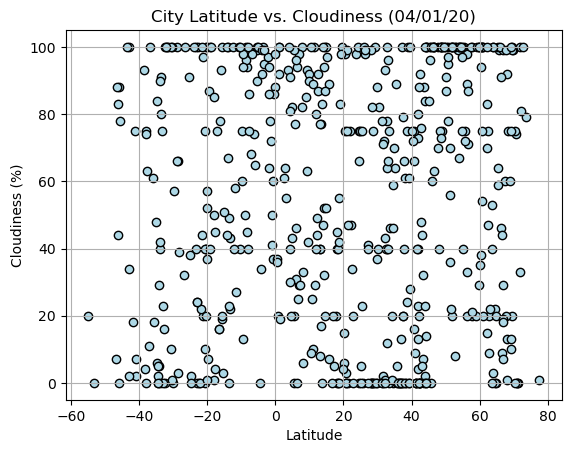

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

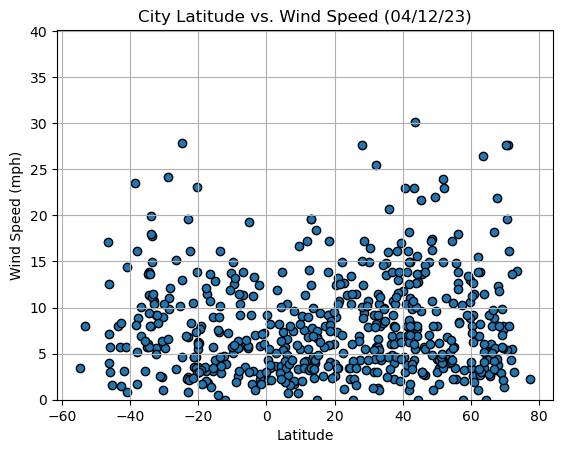

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/12/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, max(city_data_df["Wind Speed"])+10)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tuktoyaktuk,69.4541,-133.0374,-9.40,77,20,8.05,CA,1681407634
5,srednekolymsk,67.4500,153.6833,-13.07,100,60,3.20,RU,1681407635
7,zabid,14.1951,43.3152,87.48,56,32,7.09,YE,1681407636
8,tasiilaq,65.6145,-37.6368,37.56,90,99,2.55,GL,1681407636
9,talnakh,69.4865,88.3972,-11.07,98,100,7.54,RU,1681407636


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yulara,-25.2406,130.9889,76.50,43,91,10.22,AU,1681407633
1,mayumba,-3.4320,10.6554,80.76,87,95,7.02,GA,1681407633
3,bredasdorp,-34.5322,20.0403,62.02,66,0,13.87,ZA,1681407635
4,rikitea,-23.1203,-134.9692,70.75,92,100,2.48,PF,1681407635
6,ushuaia,-54.8000,-68.3000,46.02,76,20,3.44,AR,1681407593


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85


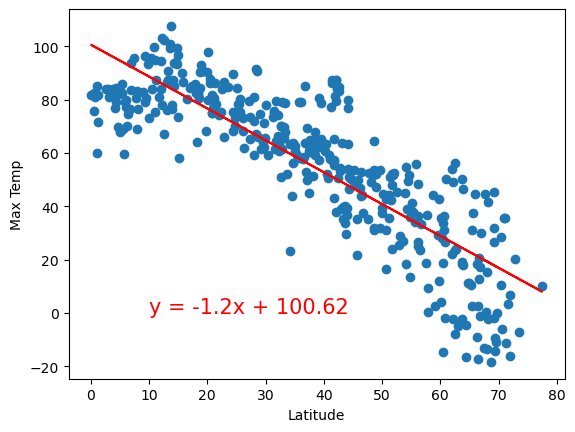

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.78


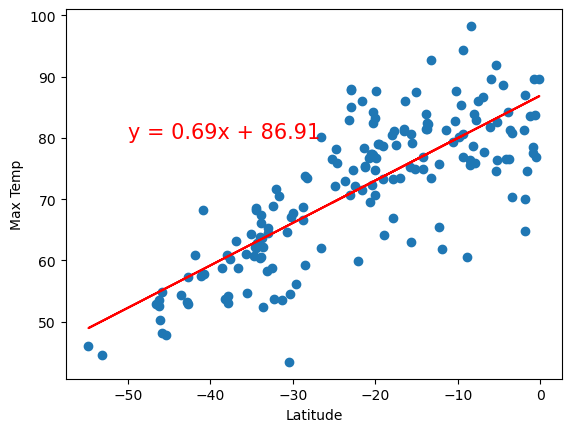

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 

# Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3


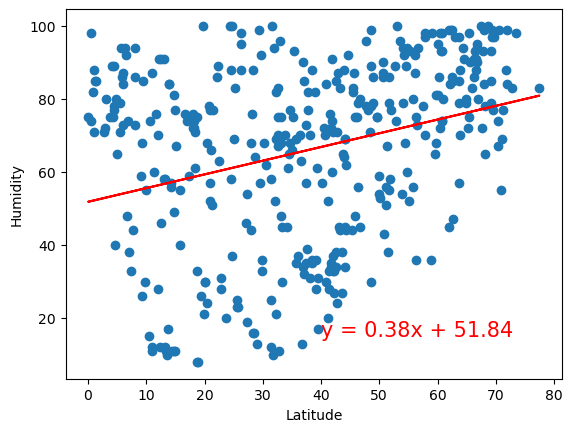

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.08


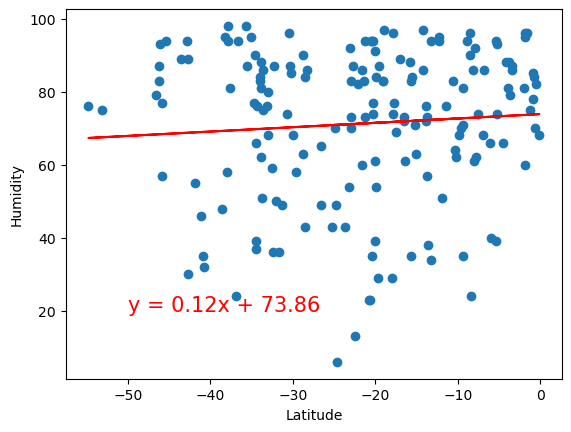

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07


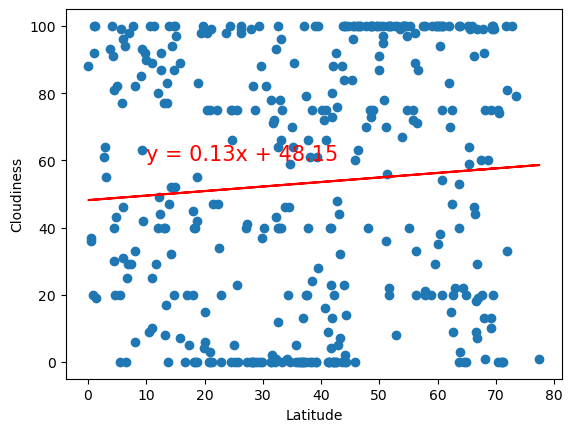

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(10,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.28


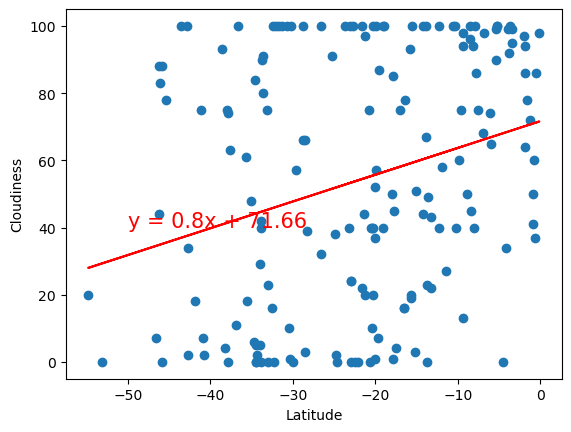

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11


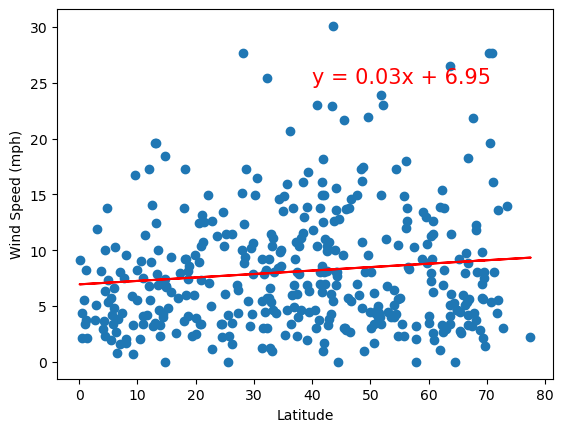

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-value is: -0.15


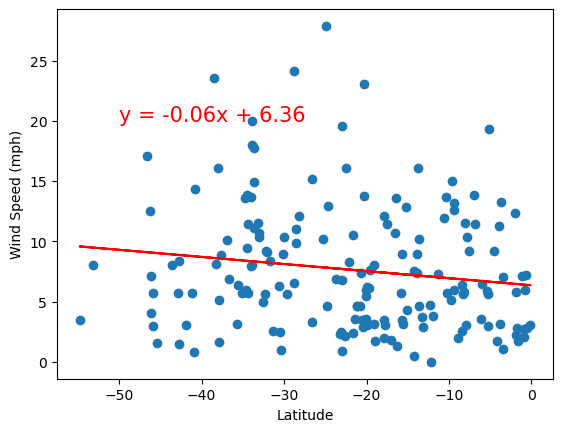

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {round(rvalue,2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE